# Title 

*note: this text is italicized
 
## Title 2

Normal text here

### This is another title?

1. Example a
2. Example b
3. Example c 

In [1]:
print("Hello World!")

Hello World!


In [1]:
# Import Python standard library and IPython packages we need.
import os
import sys
import subprocess
from IPython.display import Image

In [2]:
# Ask GRASS GIS where its Python packages are.
grass_call = "grass80"
sys.path.append(
    subprocess.check_output([grass_call, "--config", "python_path"], text=True, shell=True).strip()
)

In [3]:
# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj


In [12]:
# Start GRASS Session
gj.init("grassdata", "nc_spm_08_grass7", "user1")

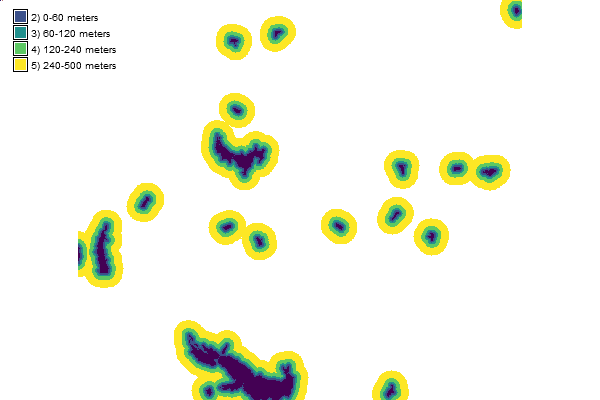

In [13]:
gs.parse_command("g.region", raster="lakes", flags="pg")
gs.run_command("r.buffer", input="lakes", output="lakes_buff", distances=[60, 120, 240, 500])

# Start a GrassRenderer
img = gj.GrassRenderer()

# Add a raster and vector to the map
img.d_rast(map="lakes_buff")
img.d_legend(raster="lakes_buff", range=(2, 5), at=(80, 100, 2, 10))

# Display map
img.show()